<a href="https://colab.research.google.com/github/alevant/mlcourse-Nov22/blob/main/Multiple_regression_4exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

We have a data set of addmission of the students to university based on the results of different tests and dependent variable: chance of admission 
We would like to build the model which helps us to estimate chance of admission

# TASK #2: IMPORT LIBRARIES AND DATASET

Import all needed packages

In [2]:
#pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
%matplotlib inline


Read csv file called admission_data.csv

In [3]:
df = pd.read_csv('admission_data.csv')


Show first 10 entries if the data

In [4]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Drop Serial No. column

In [5]:
df = df.drop('Serial No.', axis='columns')


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

Check if there and Nan values and if yes replace them with average value of the feature

In [6]:
df.fillna(df.mean(), inplace=True)


Check types of all features

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Provide statistical summary of the features

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Questions:
 

1.   What is mean of TOEFL score?
2.   What is max of CGPA?
1.   What is min chance to admit?






# TASK #4: PERFORM DATA VISUALIZATION

Using seaborn library show with one command correlation between each pair of variables and histograms of all single variables

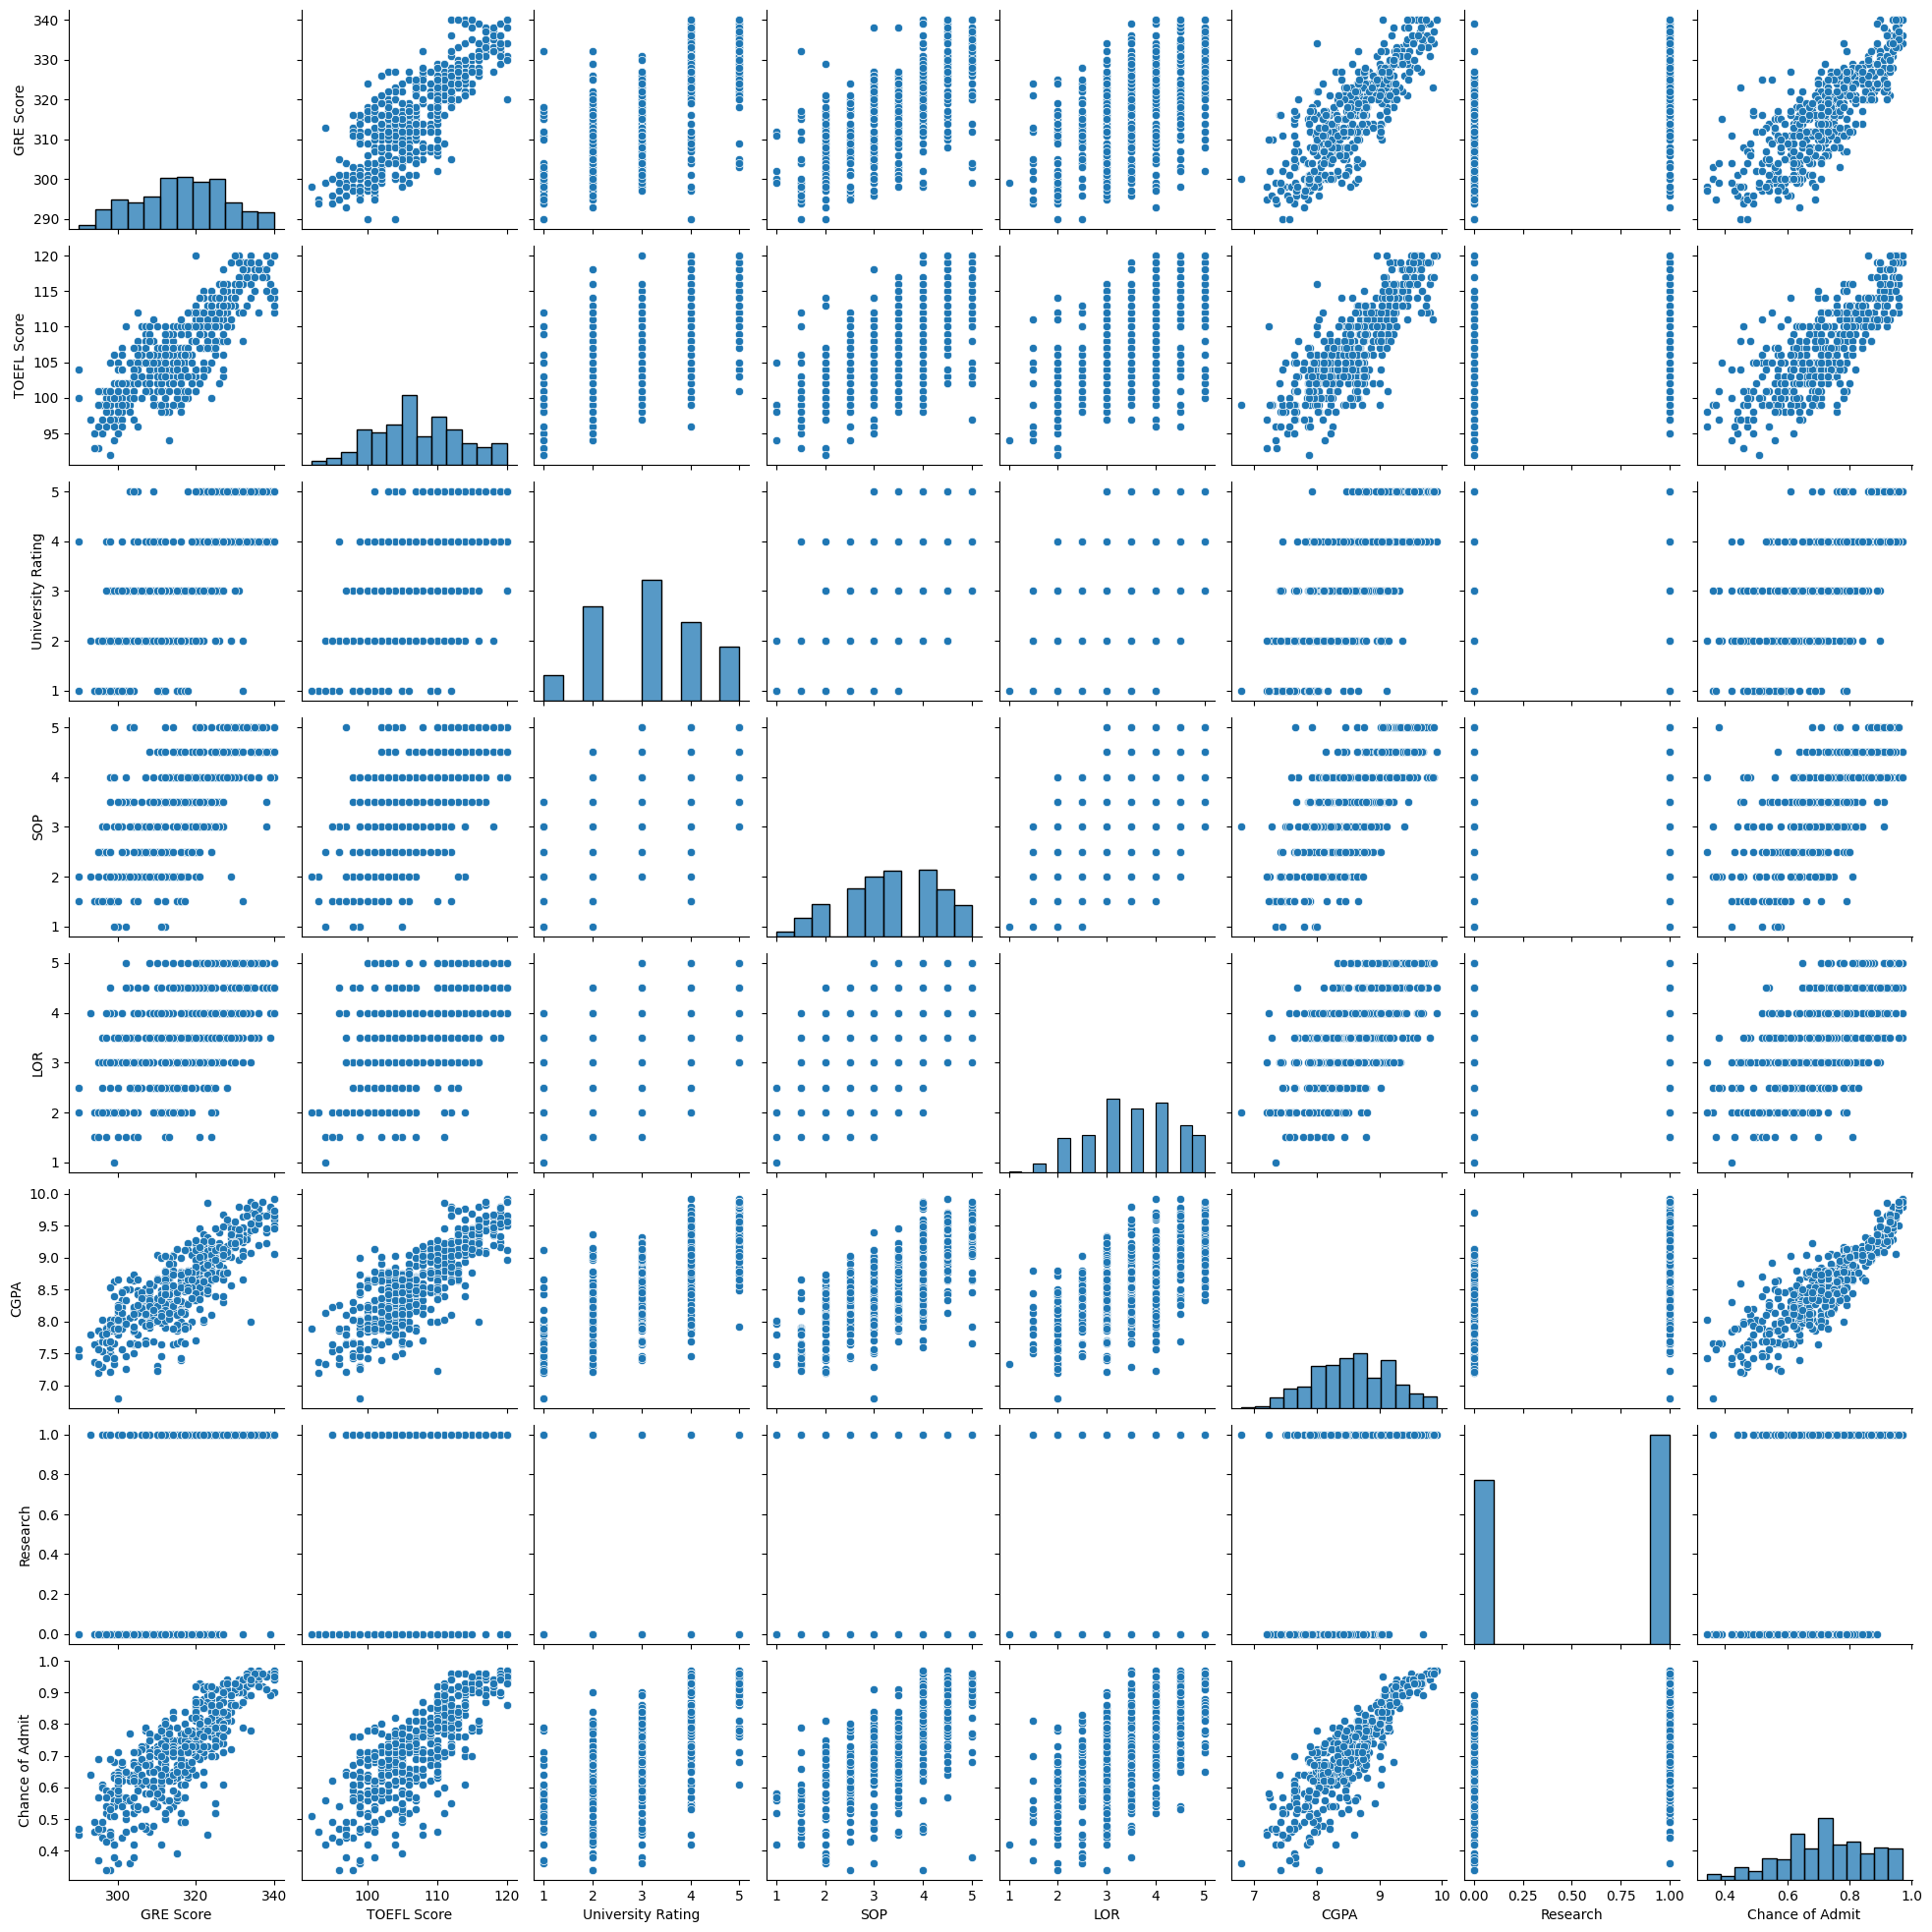

In [9]:
sns.pairplot(df)

Question:  
1.   Which features 2 show highest correlation with "chance of admission"?

2.   Which feature is less correlated to "chance of admission"?

 

Check yourself using  df.corr

In [10]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# TASK #5: CREATE SET FOR MODEL TRAINING 





Separate your df to X=independent variables and y=dependent variable (chance of admission)

In [11]:
X = df[['CGPA', 'GRE Score']]
y = df[['Chance of Admit']]


Rescale X and y and split them to train and test set , using 15% for test set:

In [12]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15)


# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

Train linear model and print out:


1.   MSE of the train data
2.   R2 of the train data
3.   R2_adj of the train data
4.   Model coeficients that you have obtained




In [26]:
from sklearn import metrics
import numpy as np
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)
y_pred_train = lin_model.predict(X_train)
MSE = np.round(metrics.mean_squared_error(y_train, y_pred_train), 3)
R2 = lin_model.score(X_train, y_train)
R2_adj = 1 - ( 1-R2 ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
b0=lin_model.intercept_[0]
b = lin_model.coef_[0]
b1= b[0]
b2= b[1]

print("MSE: ",MSE, " R^2: ",R2," R^2 adj: ",R2_adj, " b0: ",b0, " b1: ",b1, " b2: ",b2) 
          
        


MSE:  0.004  R^2:  0.8095357097372886  R^2 adj:  0.808633035375854  b0:  -1.6475751399431982  b1:  0.15851978837950081  b2:  0.0031879204249897963


Plot: 
 

1.   graph of trained vs predicted chance of admission  
2.   residules. Are they random?



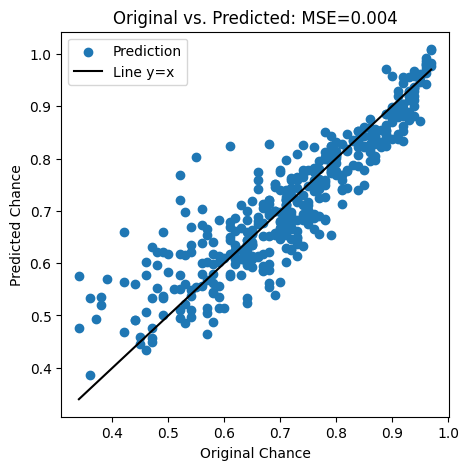

In [27]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_pred_train, label='Prediction')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k', label='Line y=x')
plt.xlabel('Original Chance')
plt.ylabel('Predicted Chance')
plt.title(f'Original vs. Predicted: MSE={MSE}')
plt.legend()


Text(0.5, 1.0, 'Plot of residules')

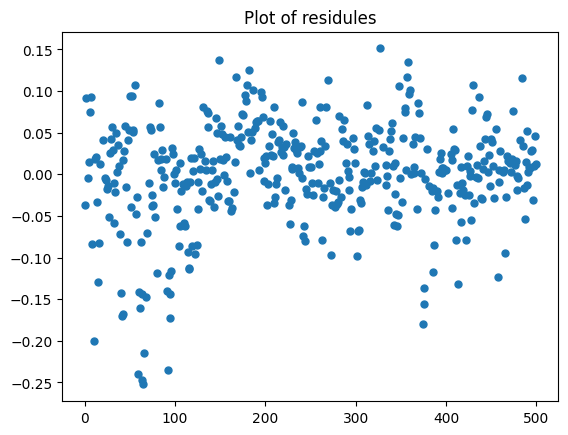

In [28]:
plt.plot(y_train-y_pred_train, ls='-', lw='0', marker='.', markersize='10')
plt.title('Plot of residules')

Make prediction on test data and calculate:


1.  MSE of test data 
2.  R2 of test data
3.  R2 adj of test data



In [30]:
lin_model_t = linear_model.LinearRegression()
lin_model_t.fit(X_test,y_test)
y_pred_test = lin_model_t.predict(X_test)
MSE_t = np.round(metrics.mean_squared_error(y_test, y_pred_test), 3)
R2_t = lin_model.score(X_test, y_test)
R2_adj_t = 1 - ( 1-R2_t ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print("MSE: ",MSE_t, " R^2: ",R2_t," R^2 adj: ",R2_adj_t) 

MSE:  0.004  R^2:  0.7247920675972161  R^2 adj:  0.7171474028082498


Plot graph of test data - predicted vs actual chance of admission

Drop "research" and "university rating" features and check if model prediction is improved 